Supervised learning

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [238]:
df = pd.read_csv(r'D:/PYTHON/heart_disease.csv', sep=";")
print(df.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  


In [239]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   cho       303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 35.6 KB
None


In [240]:
print(df.describe())

              age         sex          cp    trestbps         cho         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.683168   
std      0.994971   22.8750

In [241]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index


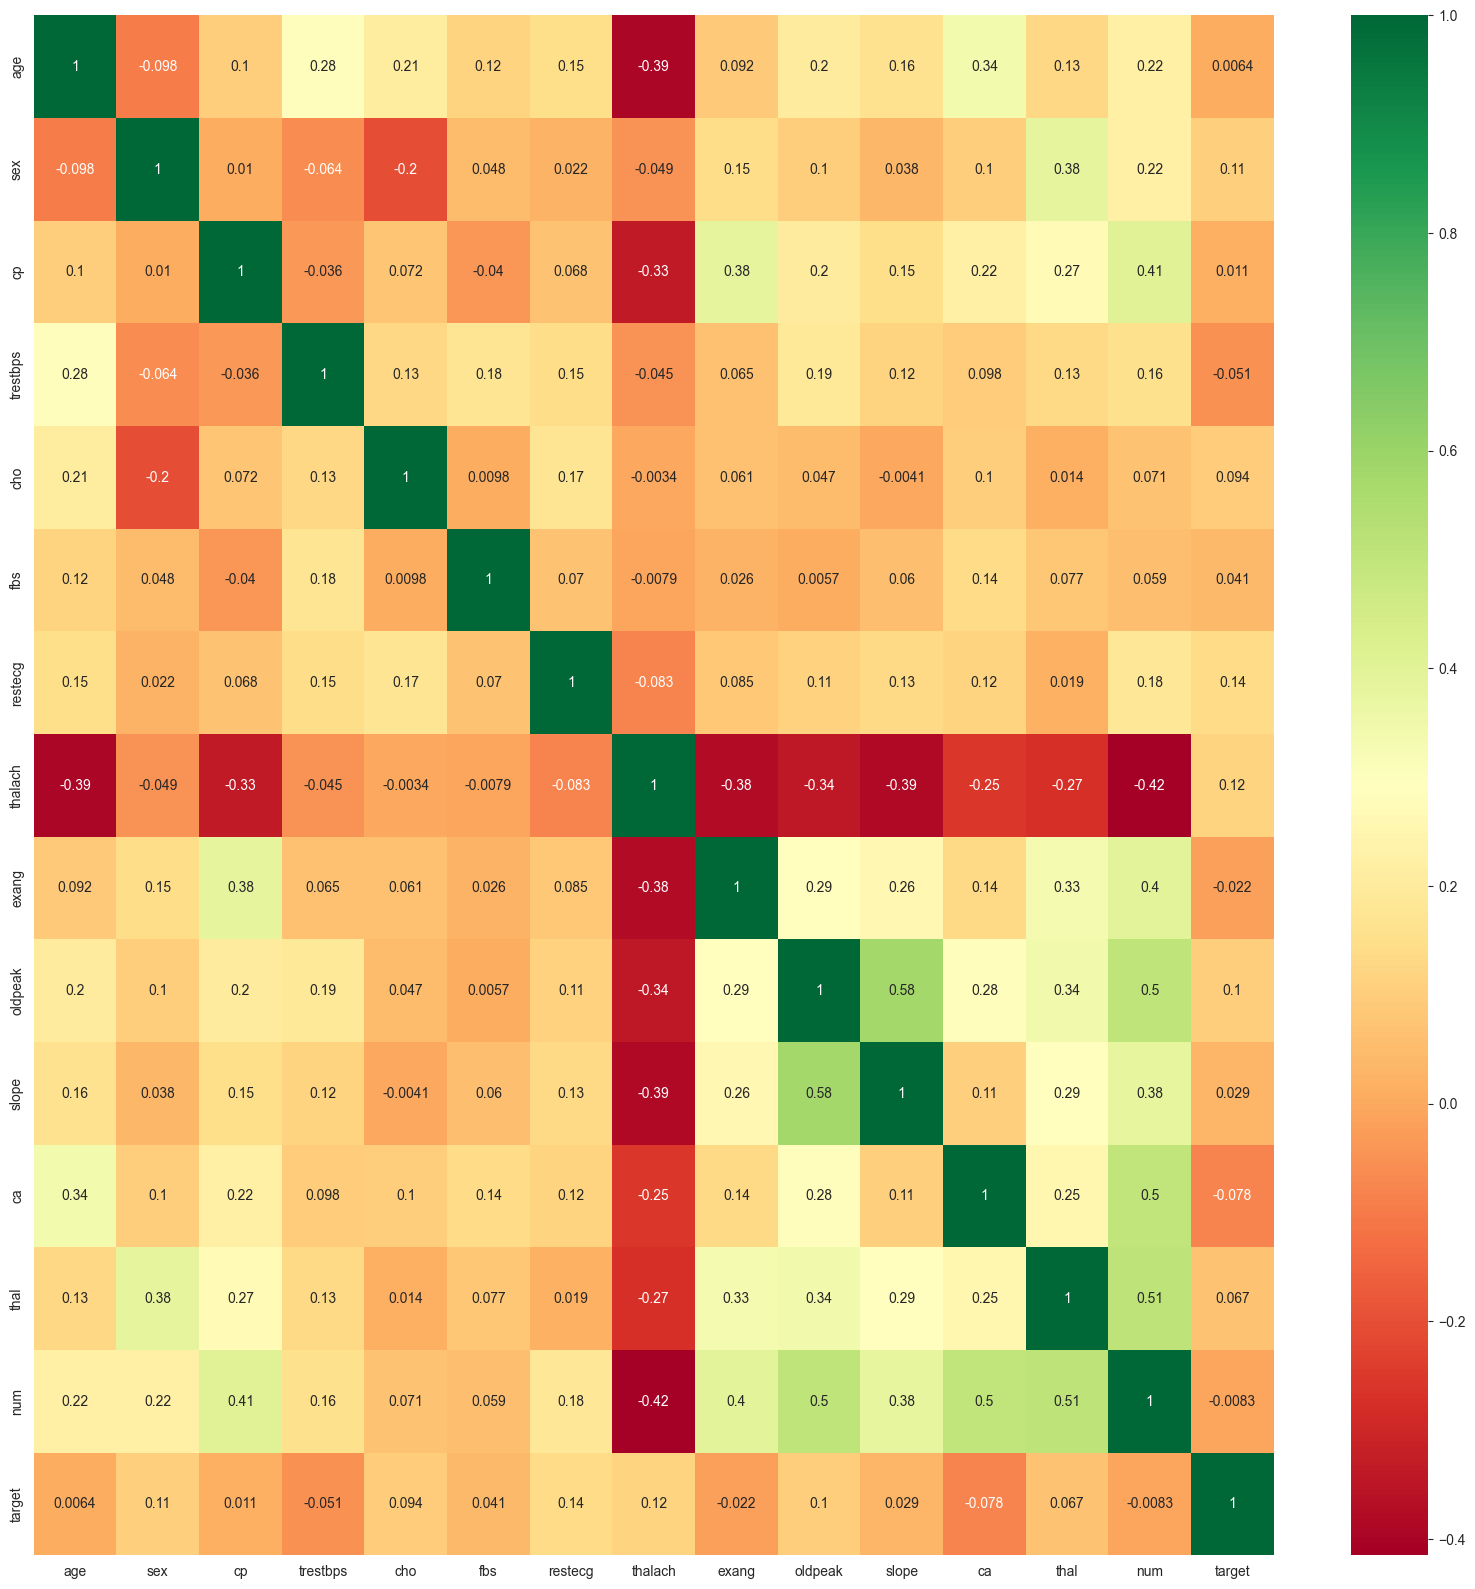

In [242]:
#plot heat map
plt.figure(figsize=(20,20))
corr=df.corr()
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.show()

[[<Axes: title={'center': 'age'}> <Axes: title={'center': 'sex'}>
  <Axes: title={'center': 'cp'}> <Axes: title={'center': 'trestbps'}>]
 [<Axes: title={'center': 'cho'}> <Axes: title={'center': 'fbs'}>
  <Axes: title={'center': 'restecg'}> <Axes: title={'center': 'thalach'}>]
 [<Axes: title={'center': 'exang'}> <Axes: title={'center': 'oldpeak'}>
  <Axes: title={'center': 'slope'}> <Axes: title={'center': 'ca'}>]
 [<Axes: title={'center': 'thal'}> <Axes: title={'center': 'num'}>
  <Axes: title={'center': 'target'}> <Axes: >]]


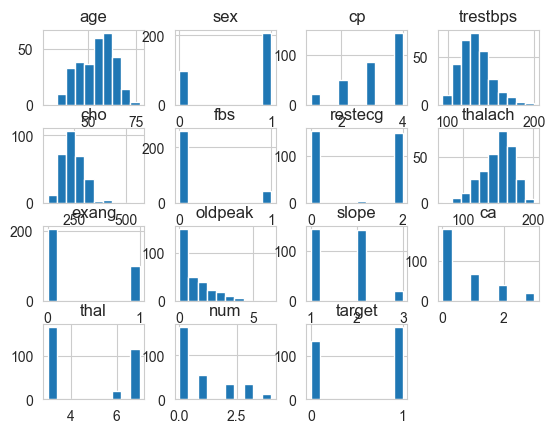

In [243]:
print(df.hist())
plt.show()

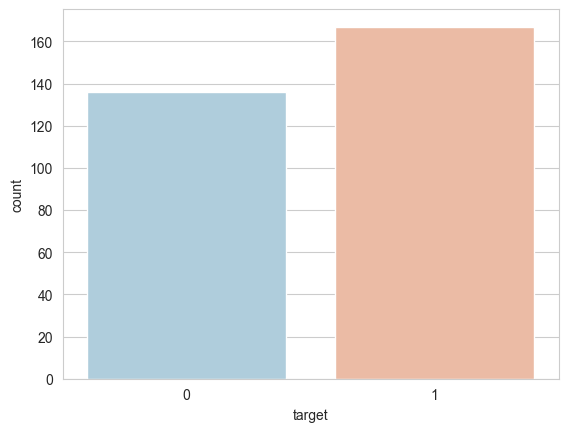

In [244]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()


In [245]:
print(df['target'].value_counts())

target
1    167
0    136
Name: count, dtype: int64


In [246]:
x = df.iloc[:,:-1]
Y = df['target']

print(x.head())
print(Y.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [247]:
from sklearn.model_selection import train_test_split
x_train, x_test,Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state= 2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(303, 14)
(242, 14)
(61, 14)


In [248]:
Y = df['target']
x = df.drop(['target'], axis = 1)

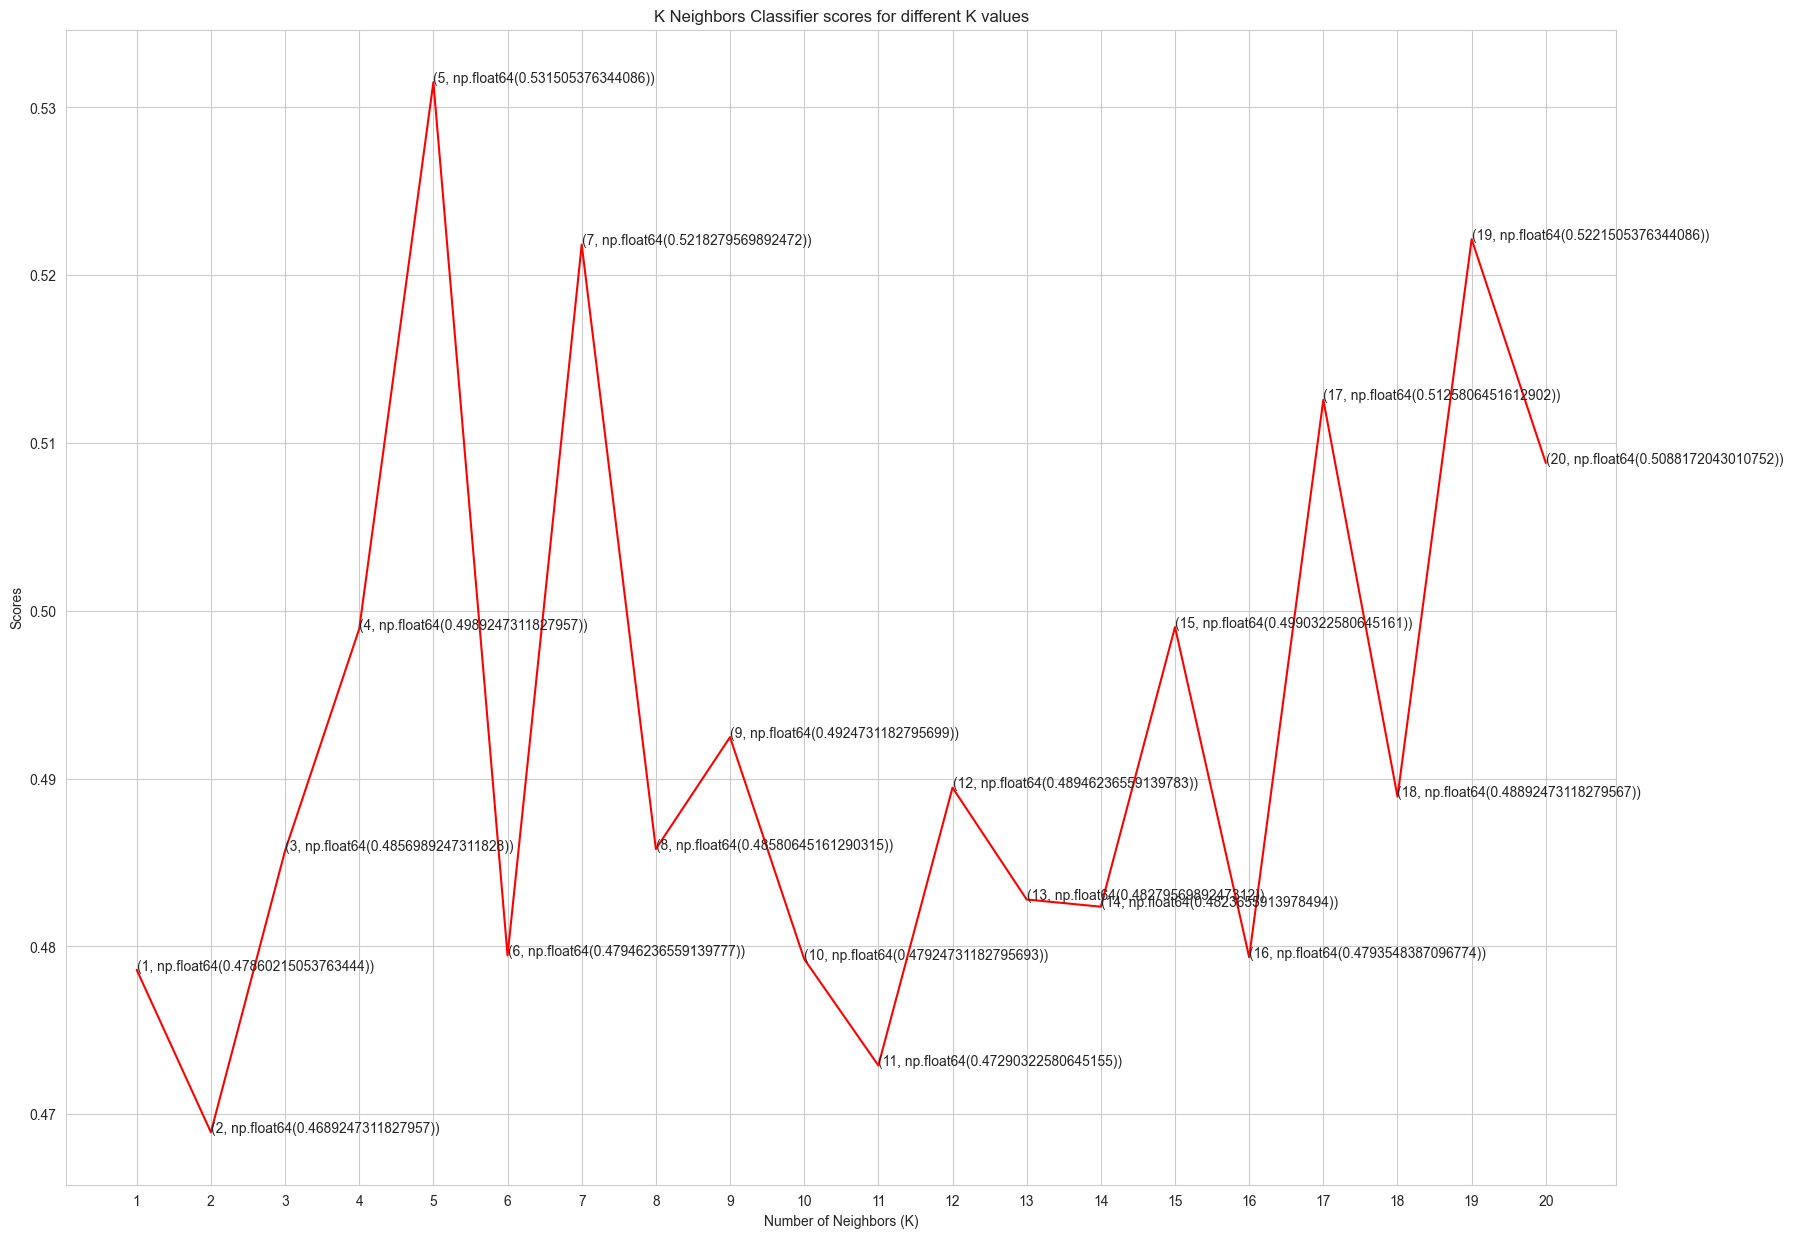

In [249]:
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(20,15))
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,Y,cv=10)
    knn_scores.append(score.mean())

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [250]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,Y,cv=10)

print(score.mean())

0.48946236559139783


Random Forest Classifier

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,x,Y,cv=10)
print(score.mean())


0.5277419354838709


In [253]:
#Model building
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [254]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, Y_train)
y_pred_log = logreg.predict(x_test)

In [255]:
#model evaluation
#accuracy
log_train = round(logreg.score(x_train, Y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, Y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, Y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(Y_test,y_pred_log))

Training Accuracy    : 67.77 %
Model Accuracy Score : 62.3 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.47      0.57        32
           1       0.57      0.79      0.67        29

    accuracy                           0.62        61
   macro avg       0.64      0.63      0.62        61
weighted avg       0.65      0.62      0.61        61



In [256]:
import scikitplot as skplt
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


In [257]:
x_train, x_test,Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state= 2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(303, 14)
(242, 14)
(61, 14)


In [258]:
model =LogisticRegression()

model.fit(x_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [259]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)
print("accuracy :", training_data_accuracy)


accuracy : 0.6776859504132231


In [260]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)
print("accuracy:", test_data_accuracy)


accuracy: 0.6229508196721312


ROC Curve & AUC

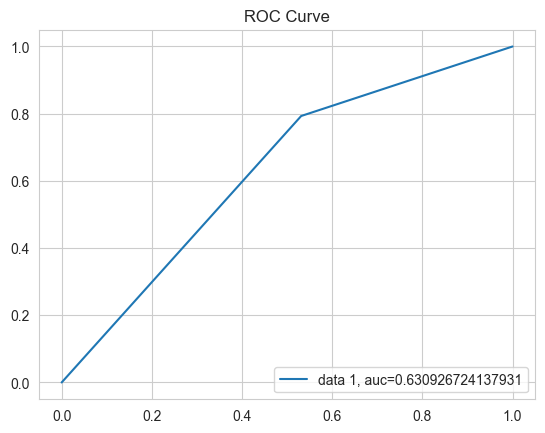

In [261]:
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_log)
auc = metrics.roc_auc_score(Y_test, y_pred_log)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

Decision Tree

In [262]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [263]:
#training our model
dt=DecisionTreeClassifier(criterion='entropy',max_depth=6)
print(dt.fit(x_train,Y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [264]:
#predicting the value on testing data
y_pred=dt.predict(x_test)

In [265]:
#ploting the data
from sklearn.metrics import confusion_matrix

In [266]:
conf_mat=confusion_matrix(Y_test,y_pred)
print(conf_mat)
accuracy=dt.score(x_test,Y_test)
print("\nThe accuracy of decisiontreelassifier on Heart disease prediction dataset is "+str(round(accuracy*100,2))+"%")


[[15 17]
 [11 18]]

The accuracy of decisiontreelassifier on Heart disease prediction dataset is 54.1%


Evaluate Model Metrics

In [267]:
#random state - to randomly split -- coulld be anything randomly
X_train, X_test, y_train, y_test = train_test_split(x, Y, random_state=42) 

In [268]:
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix



In [269]:
#NormaLisation basically
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train) 
X_test_scaled = scale(X_test)
df_svm = SVC(random_state=42) 
print(df_svm.fit(X_train_scaled, y_train))
print(x_train, X_train.shape)
print(x_test, X_test.shape)
print(X_test_scaled, X_test_scaled.shape)
print(x_train_prediction, x_train_prediction.shape)


SVC(random_state=42)
[[-0.97626211  0.67663234  0.86204366 ... -0.71779931  1.12074007
   0.        ]
 [ 0.46431979  0.67663234  0.86204366 ...  0.36112884  1.12074007
   0.79179733]
 [ 0.2426918   0.67663234  0.86204366 ... -0.71779931  0.60803857
  -0.79179733]
 ...
 [ 0.79676176  0.67663234  0.86204366 ...  1.44005699  1.12074007
   0.        ]
 [ 0.2426918   0.67663234 -0.19156526 ... -0.71779931 -0.93006596
  -0.79179733]
 [-2.19521603  0.67663234  0.86204366 ... -0.71779931  1.12074007
   0.        ]] (227, 14)
[[-0.75463413  0.67663234  0.86204366 -0.53177706 -0.51226125 -0.41119597
   1.01249171  1.67080334 -0.70272837 -0.94741277 -1.01875981 -0.71779931
  -0.93006596 -0.79179733]
 [ 0.46431979  0.67663234  0.86204366  1.95213011 -1.39200397  2.43193045
   1.01249171 -2.61117164 -0.70272837 -0.0549492   0.61395459  1.44005699
   0.60803857  1.58359465]
 [-0.42219215 -1.47790748 -0.19156526 -0.05865188  0.13798336 -0.41119597
   1.01249171  0.02045882 -0.70272837 -0.50118099 -1.

In [270]:
#accuracy
log_train = round(logreg.score(x_train, Y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, Y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, Y_test) * 100, 2)

print("Training Accuracy    :",log_train,"80%")
print("Model Accuracy Score :",log_accuracy,"20%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(Y_test,y_pred_log))


Training Accuracy    : 57.85 80%
Model Accuracy Score : 62.3 20%
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.47      0.57        32
           1       0.57      0.79      0.67        29

    accuracy                           0.62        61
   macro avg       0.64      0.63      0.62        61
weighted avg       0.65      0.62      0.61        61



In [271]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)
print("accuracy :", training_data_accuracy)

accuracy : 0.5785123966942148


In [272]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)
print("accuracy:", test_data_accuracy)

accuracy: 0.5901639344262295


In [273]:
input_data = (55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print("heart disease negative")
else:
    print("heart disease positive")

[0]
heart disease negative


In [274]:
import joblib


In [275]:
filename = 'trained_model.sav'


In [276]:
joblib.dump(prediction, filename)

['trained_model.sav']

In [277]:
#loading the saved model
loaded_model = joblib.load(open('trained_model.sav', 'rb'))
print(f"Model saved successfully as {filename}")

Model saved successfully as trained_model.sav
